In [1]:
import os
import numpy as np,numpy
import pandas as pd
from PIL import Image

In [2]:
data_matrix = numpy.ndarray(shape=(400, 10304), dtype=numpy.dtype('u1'))  # 8-bit unsigned int
label_vector = numpy.empty(shape=(400, 1), dtype=numpy.dtype('u1'))

i = 0
for dirname, _, filenames in os.walk('C:\\Users\\smart\\Desktop\\FaceRecognition-master\\dataset'):
    for filename in filenames:
        image = Image.open(os.path.join(dirname, filename))
        numpy_image = numpy.asarray(image).flatten()
        data_matrix[i] = numpy_image.copy()
        label_vector[i] = int(dirname[dirname.rindex('\\') + 2:])
        i += 1

print(data_matrix)
print(data_matrix.shape)

[[ 48  49  45 ...  47  46  46]
 [ 34  34  33 ...  37  40  33]
 [ 60  60  62 ...  32  34  34]
 ...
 [112 109 116 ...  93  88  92]
 [111 114 112 ...  88  86  92]
 [110 112 113 ...  92  87  90]]
(400, 10304)


In [3]:
# Odd rows for training
train_data = data_matrix[::2, :]
y_train = label_vector[::2, :].ravel()

# Even rows for testing
test_data = data_matrix[1::2, :]
y_test = label_vector[1::2, :].ravel()

print(test_data)
print(test_data.shape)
print("\n")
print(train_data)
print(train_data.shape)

[[ 34  34  33 ...  37  40  33]
 [ 39  44  53 ...  29  26  29]
 [ 64  76  80 ...  35  37  39]
 ...
 [110 109 111 ...  94  88  90]
 [112 109 116 ...  93  88  92]
 [110 112 113 ...  92  87  90]]
(200, 10304)


[[ 48  49  45 ...  47  46  46]
 [ 60  60  62 ...  32  34  34]
 [ 63  53  35 ...  41  10  24]
 ...
 [114 110 112 ...  93  89  86]
 [113 112 111 ...  87  87  89]
 [111 114 112 ...  88  86  92]]
(200, 10304)


In [4]:
df = pd.DataFrame(train_data)
df['class'] = y_train

In [5]:
#classes --->classes matrix
#mean_mat ---> mean for each class matrix
#samples_c ---> nu of samples per class

classes = numpy.sort(df['class'].unique())
mean_mat = df.groupby('class').mean().values
samples_c = df.groupby('class').size().values

In [6]:
#between classes matrix
#nk (nu of samples for class)
#uk (mean of class)
#u  (mean of all classes)

u = mean_mat.mean(0).reshape(1, train_data.shape[1])

B = numpy.zeros(shape=(train_data.shape[1], train_data.shape[1]))

for i in range(classes.size):
    nk = samples_c[i]
    uk = mean_mat[i].reshape(1, train_data.shape[1])
    t = uk - u
    B += nk * numpy.matmul(t.T, t)

print(B)

[[231615.82  228816.94  231111.73  ... -41390.46  -19667.31   -7796.11 ]
 [228816.94  226547.58  228482.91  ... -39573.22  -18219.37   -7079.97 ]
 [231111.73  228482.91  231351.995 ... -39955.09  -18238.365  -7093.165]
 ...
 [-41390.46  -39573.22  -39955.09  ... 335064.38  304869.63  288210.43 ]
 [-19667.31  -18219.37  -18238.365 ... 304869.63  292480.555 277844.955]
 [ -7796.11   -7079.97   -7093.165 ... 288210.43  277844.955 272640.155]]


In [7]:
#within class matrix
#class_ss --> class samples
#class_m --> class mean

S = numpy.zeros(shape=(train_data.shape[1], train_data.shape[1]))

for i in range(classes.size):
    class_ss = df.loc[df['class'] == i + 1].values[:, :-1]
    class_m = mean_mat[i].reshape(1, train_data.shape[1])
    centered_data = numpy.subtract(class_ss, class_m)
    s = numpy.matmul(centered_data.T, centered_data)
    S = S + s

print(S)

[[ 26322.   24844.8  24771.6 ...   -757.2  -2197.8   3702.4]
 [ 24844.8  25913.6  24942.4 ...    190.6   -395.4   4566. ]
 [ 24771.6  24942.4  25832.4 ...   -331.2    332.4   6442.8]
 ...
 [  -757.2    190.6   -331.2 ... 143575.2  90017.8  74673.8]
 [ -2197.8   -395.4    332.4 ...  90017.8  96311.6  82691. ]
 [  3702.4   4566.    6442.8 ...  74673.8  82691.   95567.6]]


In [8]:
S_inv = numpy.linalg.inv(S)
print(S_inv)

[[ 6.44521012e+09 -1.91552011e+10 -6.66554519e+09 ...  3.62676315e+09
   4.03286156e+09 -9.69355912e+09]
 [ 1.19487261e+10  1.97400512e+10  9.32816022e+09 ... -1.10771591e+09
  -1.80629774e+10  7.67029305e+09]
 [-9.04521970e+08 -1.27049881e+10 -3.85650516e+09 ...  1.33825280e+09
   1.34168425e+09 -4.67911968e+08]
 ...
 [ 3.02447312e+08  2.13741873e+09  1.68951003e+09 ... -7.36345905e+08
  -1.68087018e+09  1.30560938e+09]
 [ 5.74509320e+08  1.43490122e+08  3.39792749e+08 ...  2.29707472e+08
  -2.60068401e+08  4.34157531e+07]
 [-5.78154172e+08 -5.37654456e+09 -3.08638711e+09 ...  2.00941910e+09
   3.12026603e+09 -3.77880932e+09]]


In [9]:
eigen_values, eigen_vectors = numpy.linalg.eigh(numpy.matmul(S_inv, B))

In [10]:


#sort the eigenvalues and eigenvectors in descending order
sorted_index = numpy.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

# sorted_eigenvectors = numpy.real_if_close(sorted_eigenvectors)

sorted_eigenvectors

array([[ 0.00274824, -0.00318418,  0.00343668, ..., -0.00392303,
         0.00316831, -0.00260275],
       [ 0.00348104, -0.00252907,  0.00303004, ..., -0.00351025,
         0.00252503, -0.0033421 ],
       [ 0.00256418, -0.0031347 ,  0.00378994, ..., -0.00424561,
         0.00309765, -0.00240324],
       ...,
       [-0.00149346, -0.00116227,  0.00853946, ...,  0.00870456,
        -0.00104119, -0.00156505],
       [ 0.00043254, -0.00278461, -0.01021784, ..., -0.01039581,
        -0.00284783,  0.00040148],
       [ 0.00793071,  0.01706245,  0.02417486, ...,  0.02448843,
         0.01703265,  0.00817426]])

In [11]:
U = sorted_eigenvectors[:, 0:39]
U.shape

(10304, 39)

In [12]:
X_train = numpy.matmul(train_data, U)
X_test = numpy.matmul(test_data, U)

print(X_train.shape)
print(X_test.shape)

(200, 39)
(200, 39)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_vals=[1,3,5,7]
acc=[]
for i in range(len(k_vals)):
    knn = KNeighborsClassifier(n_neighbors=k_vals[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

print("Accuracy:", acc)

Accuracy: [0.95, 0.855, 0.785, 0.775]


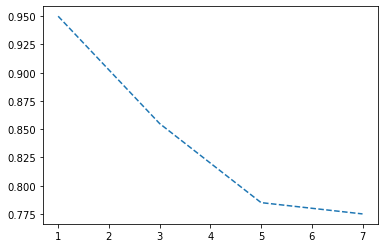

In [14]:
import matplotlib.pyplot as plt
plt.plot(k_vals,acc, linestyle = 'dashed')
plt.show()

In [15]:
non_faces = numpy.ndarray(shape=(374, 10304), dtype=numpy.dtype('u1'))  # 8-bit unsigned int
i = 0
for dirname, _, filenames in os.walk('C:\\Users\\smart\\Desktop\\non_faces'):
    for filename in filenames:
        image = Image.open(os.path.join(dirname, filename))
        image = image.resize((92,112))
        numpy_image = numpy.asarray(image).flatten()
        non_faces[i] = numpy_image.copy()
        i += 0
        

In [16]:
df['class']=1
df1=pd.DataFrame(non_faces[:200])
df1['class']=0
df = df.append(df1, ignore_index=True)

In [17]:
# Odd rows for training
train_data = df.values[::2, :-1]
y_train = df['class'].values[::2].ravel()

# Even rows for testing
test_data = df.values[1::2, :-1]
y_test = df['class'].values[1::2].ravel()


In [18]:
new_df = pd.DataFrame(train_data)
new_df['class'] = y_train

In [19]:
new_data_matrix=new_df.values[:,:-1]
new_label_vector=new_df['class'].values
new_label_vector=np.array([new_label_vector]).T

In [20]:
classes = numpy.sort(new_df['class'].unique())
mean_mat = new_df.groupby('class').mean(0).values
samples_c = new_df.groupby('class').size().values

In [21]:
B= (mean_mat[0].reshape(10304,1)-mean_mat[1].reshape(10304,1) )*(mean_mat[0]-mean_mat[1] )

In [22]:
S = numpy.zeros((10304, 10304))
for i in range(classes.size):
    class_ss = df.loc[df['class'] == i + 1].values[:, :-1]
    class_m = mean_mat[i]
    centered_data = numpy.subtract(class_ss, class_m)
    s = numpy.matmul(centered_data.T, centered_data)
    S = S + s

In [23]:
S_inv = numpy.linalg.inv(S)
print(S_inv)

[[-4.77066153e+08 -2.58040812e+08  1.06667653e+08 ...  3.06887260e+07
   3.76198108e+08 -5.57687840e+08]
 [ 1.06519994e+09  5.24337001e+08 -3.90936464e+08 ... -1.26116295e+08
  -7.36878359e+08  1.18353811e+09]
 [-6.91012591e+08 -1.83569378e+08  2.06698739e+08 ...  1.23918025e+08
   4.18760482e+08 -7.04120774e+08]
 ...
 [-9.07734496e+07 -3.72846185e+07  4.06951185e+07 ... -9.96450143e+04
   8.00991113e+07 -9.99332292e+07]
 [-7.33588338e+07 -2.45938434e+07  3.53169197e+07 ...  3.76174219e+06
   5.37966404e+07 -7.74450370e+07]
 [-1.59488468e+08 -6.85704954e+07  7.67646315e+07 ...  3.53694861e+07
   9.66467171e+07 -1.86346188e+08]]


In [24]:
eigen_values, eigen_vectors = numpy.linalg.eigh(numpy.matmul(S_inv, B))

In [25]:
#sort the eigenvalues and eigenvectors in descending order
sorted_index = numpy.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]
# sorted_eigenvectors = numpy.real_if_close(sorted_eigenvectors)
sorted_eigenvectors

array([[ 0.01135866, -0.01838676,  0.02548621, ..., -0.0248522 ,
         0.0185537 , -0.01133647],
       [ 0.01137527, -0.01849753,  0.02573473, ..., -0.02449302,
         0.01836401, -0.01126614],
       [ 0.0114679 , -0.01882473,  0.02642553, ..., -0.02380319,
         0.01801017, -0.01116232],
       ...,
       [ 0.00614315,  0.00669811,  0.00573438, ...,  0.0057981 ,
         0.0066776 ,  0.006142  ],
       [ 0.00505621,  0.00551647,  0.00472347, ...,  0.00477253,
         0.0054957 ,  0.00505512],
       [ 0.01193972,  0.01301967,  0.01114456, ...,  0.01127645,
         0.01298794,  0.01193948]])

In [26]:
U = sorted_eigenvectors[:, 0:1]
U.shape

(10304, 1)

In [27]:
X_train = numpy.matmul(train_data, U)
X_test = numpy.matmul(test_data, U)

print(X_train.shape)
print(X_test.shape)

(200, 1)
(200, 1)


In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_vals=[1,3,5,7]
acc=[]
for i in range(len(k_vals)):
    knn = KNeighborsClassifier(n_neighbors=k_vals[i])
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))

print("Accuracy:", acc)

Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5]
